# Week 3
Solution By Jaydeep Dholakia

## Q1. Explain, in detail, the below transform methods.

### Log transform:
It is a transformation method where we take natural log of the data. It is taken when data has trends which are extreme exponential and the data distribution is is also exponential. It converts data into more linear growth. It is basically elminating exponentialness from the data. Inverse of e, which is log.

### Square root transform
In this transform, we take square root of the data. When the data has a quadratic growth trend, it can be made linear by taking the square root. It is basically elminating quadratic growth from the data.

### Box Cox Transform
It is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms. It transforms automatically and select a best fit. It results more linear trend and data distribution is more normal.

It takes an argument, called lambda, that controls the type of transform to perform.

Below are some common values for lambda

lambda = -1. is a reciprocal transform.
lambda = -0.5 is a reciprocal square root transform.
lambda = 0.0 is a log transform.
lambda = 0.5 is a square root transform.
lambda = 1.0 is no transform.

If no lambda is given then it takes value which is statistically tuned of lambda. Which is the reason is gives more linear trend and normal data distribution.

## Q2: Perform similar transformations to the temperature dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from scipy import stats # For Box Cox Transform

In [8]:
df = pd.read_csv("../Week 1/testset.csv")
df.head()

,datetime,Temperature
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.head()

,Temperature
datetime,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [11]:
df = df.resample('M').mean().interpolate()
df.head()

,Temperature
datetime,
1996-11-30,19.438944
1996-12-31,13.816794
1997-01-31,12.871118
1997-02-28,15.778777
1997-03-31,21.137037


In [25]:
# Splitting the data into Train and Test data

df_train = df['2001':'2015']
df_test = df['2016':]

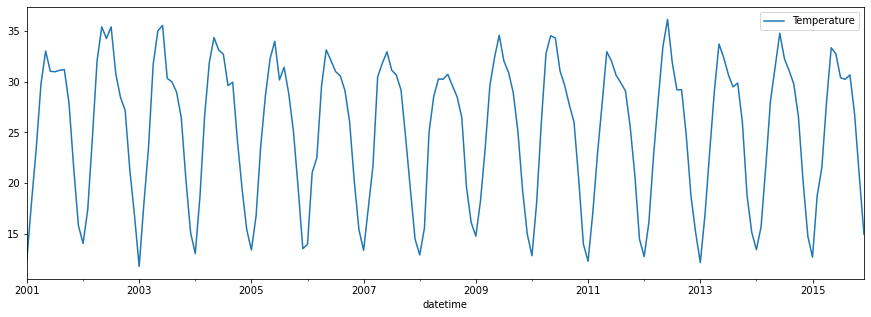

In [26]:
df_train.plot(figsize=(15,5))

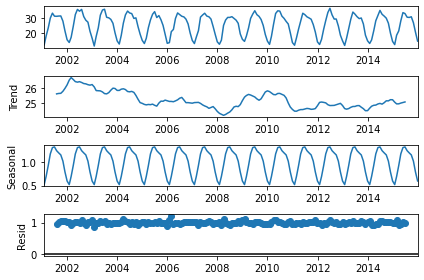

In [27]:
df_seasonal = seasonal_decompose(df_train, model='multiplicative')
df_seasonal.plot()
plt.show()

In [31]:
def test_stationary(main_data):
    # Check with rolling mean & Standard Deviation
    rollmean = main_data.rolling(window=24).mean()
    rollstd = main_data.rolling(window=24).std()
    plt.figure(figsize=(10,5))
    origal = plt.plot(main_data, color='blue', label='Orignal')
    mean = plt.plot(rollmean, color='red', label='Mean')
    std = plt.plot(rollstd, color='black', label='Standard Dev.')
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)
    
    # Check with Dickey-Fuller
    adf_values = adfuller(main_data)
    df_output = pd.Series(adf_values[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adf_values[4].items():
        df_output['Critical Value (%s)'%key] = value
    print("\nDickey-Fuller Test Results:\n",df_output)
    if adf_values[1] > 0.05 and df_output['Test Statistic'] > df_output['Critical Value (1%)']:
        print("\nWeak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
    else:
        print("\nStrong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")

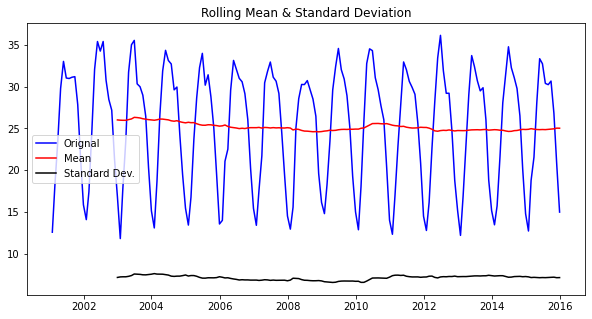


Dickey-Fuller Test Results:
 Test Statistic                  -2.182466
p-value                          0.212671
#Lags Used                      11.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64

Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [32]:
test_stationary(df_train)

## Applying Transformers

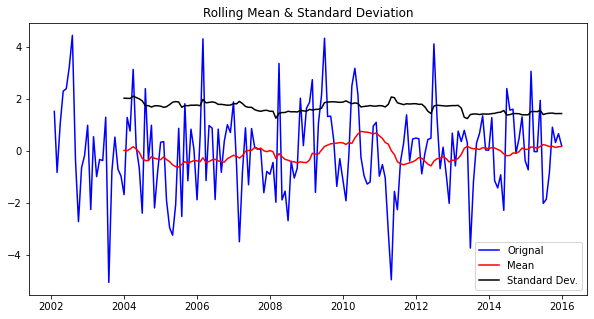


Dickey-Fuller Test Results:
 Test Statistic                -6.338118e+00
p-value                        2.797823e-08
#Lags Used                     1.100000e+01
Number of Observations Used    1.560000e+02
Critical Value (1%)           -3.472979e+00
Critical Value (5%)           -2.880252e+00
Critical Value (10%)          -2.576747e+00
dtype: float64

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [35]:
test_stationary(df_train.diff(12).dropna())

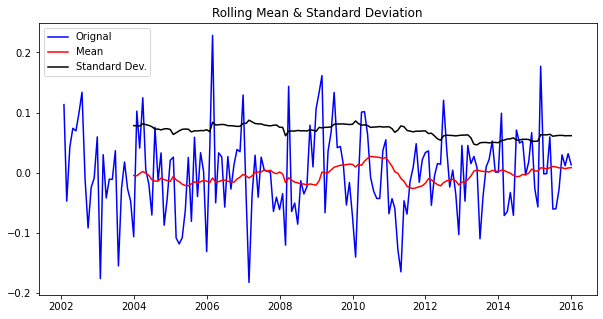


Dickey-Fuller Test Results:
 Test Statistic                -6.355729e+00
p-value                        2.545684e-08
#Lags Used                     1.100000e+01
Number of Observations Used    1.560000e+02
Critical Value (1%)           -3.472979e+00
Critical Value (5%)           -2.880252e+00
Critical Value (10%)          -2.576747e+00
dtype: float64

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [42]:
test_stationary(np.log(df_train).diff(12).dropna())

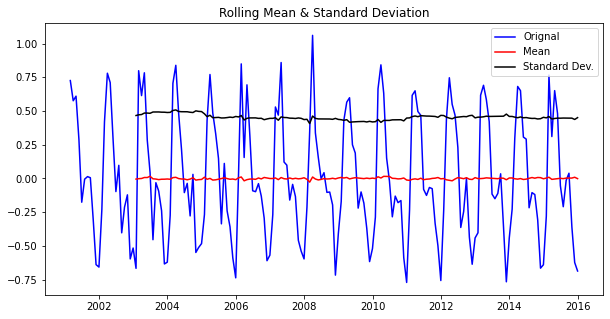


Dickey-Fuller Test Results:
 Test Statistic                -1.442228e+01
p-value                        7.875989e-27
#Lags Used                     1.000000e+01
Number of Observations Used    1.680000e+02
Critical Value (1%)           -3.469886e+00
Critical Value (5%)           -2.878903e+00
Critical Value (10%)          -2.576027e+00
dtype: float64

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [43]:
test_stationary(np.sqrt(df_train).diff().dropna())

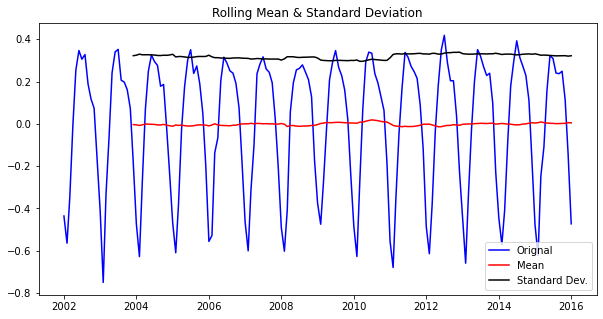


Dickey-Fuller Test Results:
 Test Statistic                  -3.734849
p-value                          0.003649
#Lags Used                      13.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [44]:
log_data = np.log(df_train)
log_data_moving_average = log_data.rolling(window=12).mean()
ma_log_data = (log_data-log_data_moving_average).dropna()
test_stationary(ma_log_data)

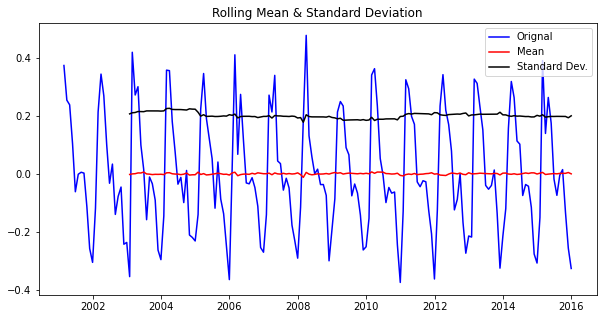


Dickey-Fuller Test Results:
 Test Statistic                -1.772017e+01
p-value                        3.471143e-30
#Lags Used                     1.000000e+01
Number of Observations Used    1.680000e+02
Critical Value (1%)           -3.469886e+00
Critical Value (5%)           -2.878903e+00
Critical Value (10%)          -2.576027e+00
dtype: float64

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [47]:
log_shifted = (log_data - log_data.shift()).dropna()
test_stationary(log_shifted)